In [11]:
import yt
import matplotlib
import matplotlib.pyplot as plt

import os
import shutil
import numpy as np

In [12]:
yt.funcs.mylog.setLevel(50)

FVS_path = '/srv/public/Maikel/FiniteVolumeSolver'
extra_path = '{}/extra'.format(FVS_path)

debug_path = '{}/build_2D-Debug/AcousticWaveWall/Debug'.format(FVS_path)

def LoadFVS(base_dir, step_dir, partname, timestep):
  path = os.path.join(base_dir, step_dir, partname+'plt{:09d}'.format(timestep))
  shutil.copy2('{}/yt/WarpXHeader'.format(extra_path), path)
  shutil.copy2('{}/yt/warpx_job_info'.format(extra_path), path)
  return yt.load(path)

substeps = [
    'BK19_pre-step',
    'BK19_advect',
    'BK19_advect-backward',
    'BK19_advect-backward-forward',
    'BK19_advect-backward-forward-advect',
    'BK19_advect-backward-forward-advect-backward'
]

In [13]:
def PlotField(dataset, field):
    dims = dataset.domain_dimensions

    p = yt.SlicePlot(dataset, 'z', field)
    p.set_buff_size([dims[0], dims[1]])
    array = np.array(p.frb[field])
    
    print("{}:".format(field))
    plt.imshow(array, origin='lower')
    plt.colorbar()
    plt.show()

def PlotMultipleFields(ds, fields):
    [PlotField(ds, field) for field in fields]
    

fields = {
    '': ["Density", "Momentum_0", "Momentum_1", "PTdensity", "PTinverse"],
    'BK19_pre-step': ["Density", "Momentum_0", "Momentum_1", "PTdensity", "PTinverse", "pi_nd2cellavg"],
    'BK19_advect': ["Density", "Momentum_0", "Momentum_1", "PTdensity", "PTinverse", "pi_nd2cellavg"],
    'BK19_advect-backward': ["Density", "Momentum_0", "Momentum_1", "PTdensity", "PTinverse", "Momentum_corr0", "Momentum_corr1", "alpha_nd2cellavg", "pi_nd2cellavg", "solution_nd2cellavg", "sigma", "rhs_plus_alpha_nd2cellavg"],
    'BK19_advect-backward-forward': ["Density", "Momentum_0", "Momentum_1", "PTdensity", "PTinverse", "div_Pv_nd2cellavg", "pi_nd2cellavg", "Momentum_corr0", "Momentum_corr1", "Pi_correction_nd2cellavg", "Pu", "Pv"],
    'BK19_advect-backward-forward-advect': ["Density", "Momentum_0", "Momentum_1", "PTdensity", "PTinverse", "pi_nd2cellavg", "Pu", "Pv"],
    'BK19_advect-backward-forward-advect-backward': ["Density", "Momentum_0", "Momentum_1", "PTdensity", "PTinverse", "Momentum_corr0", "Momentum_corr1", "alpha_nd2cellavg", "pi_nd2cellavg", "solution_nd2cellavg", "sigma"],
}

def PlotSubstep(substep, timestep, partition='partition_0_'):
    ds = LoadFVS(debug_path, substep, 'partition_0_', timestep)
    return PlotMultipleFields(ds, fields[substep])

Density:
Momentum_0:
Momentum_1:
PTdensity:
PTinverse:
Momentum_corr0:
Momentum_corr1:
alpha_nd2cellavg:
pi_nd2cellavg:
solution_nd2cellavg:
sigma:
rhs_plus_alpha_nd2cellavg:


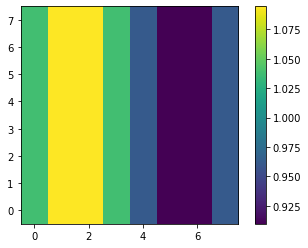

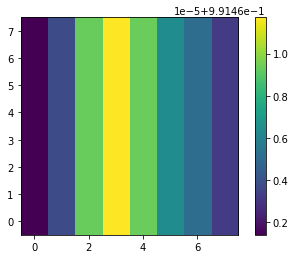

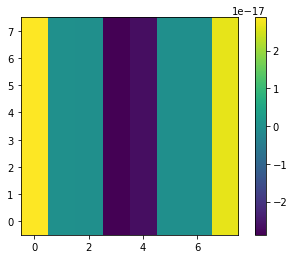

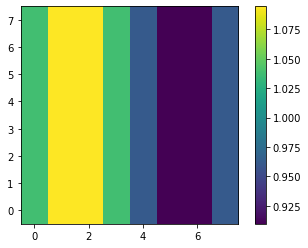

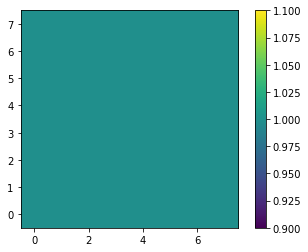

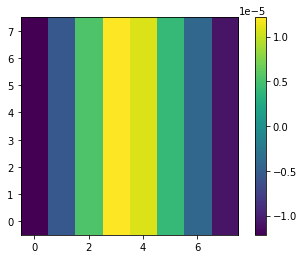

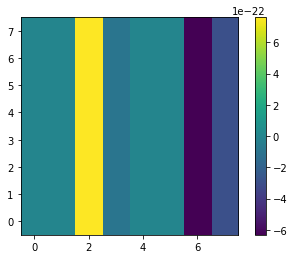

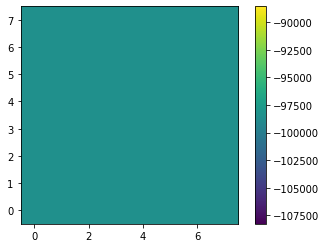

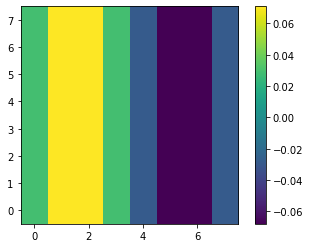

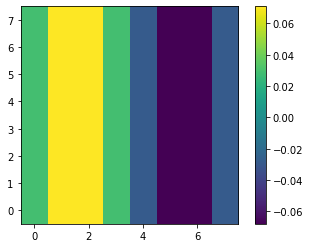

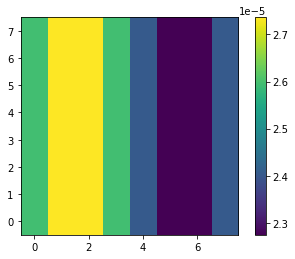

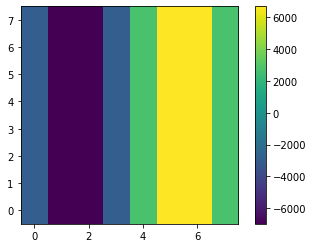

In [14]:
PlotSubstep(substeps[2], 1)